In [161]:
import matplotlib.pyplot as plt
import numpy as np
import scipy


 

<center><h1>Modulação AM</h1></center>

A modulção AM, consiste em fazer uso de uma onda senoidal, onda modulante, que desloca o sinal em banda base para um  banda passante.

<center><h5>Modulação em Tom único</h5></center></br>
Considera-se que o sinal a ser transportado trata-se de um  cosseno com  uma frequência  $f_m$ 

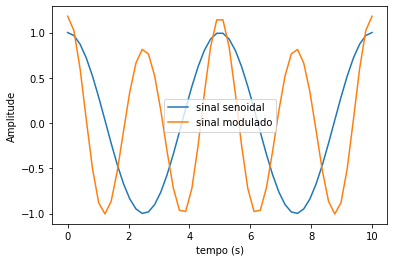

In [162]:
t = np.linspace(0,10)
fm = 10
fc = 20
ac = 1
ka =0.18
m = np.cos(2*np.pi*fm*t) 
c = np.cos(2*np.pi*fc*t)
s = ac*(1+ ka*np.array(m))*np.array(c)
plt.plot(t,m,label='sinal senoidal')
plt.plot(t,s,label='sinal modulado')
plt.xlabel('tempo (s)')
plt.ylabel('Amplitude')
plt.legend()

Observa-se agora o impacto visual de variar-se ka

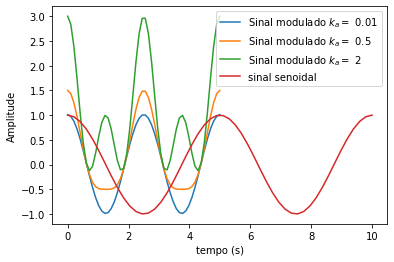

In [163]:
def modulacaoam(ka,m):
    t = np.linspace(0,5)
    fm = 10
    fc = 20
    ac = 1
    c = np.cos(2*np.pi*fc*t)
    s = ac*(1+ ka*np.array(m))*np.array(c)
    plt.plot(t,s,label='Sinal modulado $k_a=$ '+str(ka))
    plt.xlabel('tempo (s)')
    plt.ylabel('Amplitude')
    plt.legend()
modulacaoam(0.01,m)
modulacaoam(0.5,m)
modulacaoam(2,m)
plt.plot(t,m,label='sinal senoidal')
plt.legend()

 ..
 

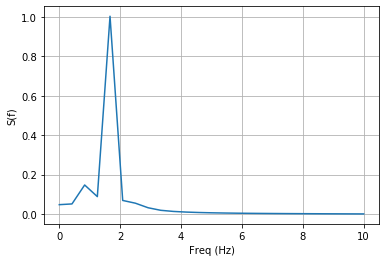

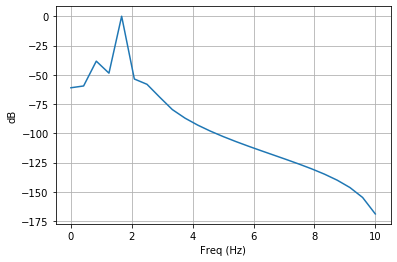

In [164]:
from scipy.fft import fft
# Number of sample points
N = len(t)
# sample spacing
T =  1/fc
x= t
y = s
yf = fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
import matplotlib.pyplot as plt
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.xlabel('Freq (Hz)')
plt.ylabel('S(f)')
plt.grid()
plt.show()
plt.plot(xf, 20*np.log( 2.0/N * np.abs(yf[0:N//2])) )
plt.xlabel('Freq (Hz)')
plt.ylabel('dB')
plt.grid()

<center><h5>Detector de envoltória</h5></center></br>

 Como na modulação, a demodulação de uma onda AM pode ser realizada usando-se vários dispositivos: aqui descreveremos um dispositivo simples, mas altamente eficaz, conhecido como o detector de envoltória.

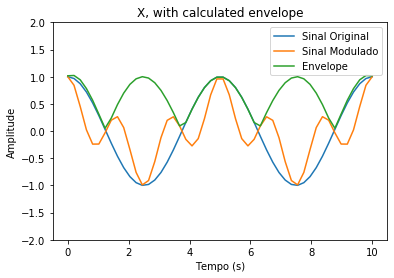

In [165]:
#!/usr/bin/env python

from numpy import *
from scipy import *
from scipy.signal import *
from pylab import *


# Generate AM-modulated sinusoid
N = 256
t = t
# Modulator
 
# Carrier
 

# Signal is modulator times carrier
x = m*c


# Calculate envelope, called m_hat via hilbert transform
m_hat = abs(hilbert(x))

# Plot x
plot(t, m)
plot(t, x)
plot(t, m_hat)
axis('tight')
xlabel('Tempo (s)')
ylabel('Amplitude')
title('X, with calculated envelope')
legend(['Sinal Original', 'Sinal Modulado','Envelope'])
ylim(-2,2)
show()

subida 8 : 0.48740682716015593
subida 9 : 0.6982800717569697
subida 10 : 0.8595793271354272
subida 11 : 0.9614990831365647
subida 12 : 1.0004800025272351
subida 13 : 0.9755880364610293
subida 20 : 0.40068143629822933
subida 21 : 0.6194151773416585
subida 22 : 0.798475930548205
subida 23 : 0.9257081300362232
subida 24 : 0.9916243725676906
subida 25 : 0.9916243725676758
subida 32 : 0.33927133160721795
subida 33 : 0.5616431754625821
subida 34 : 0.7489872427601166
subida 35 : 0.8896569051127463
subida 36 : 0.9755880364609756
subida 37 : 1.0004800025272331
subida 44 : 0.3111717789670804
subida 45 : 0.5668654032223752
subida 46 : 0.7818548226612698
subida 47 : 0.9434457514785942
subida 48 : 1.022683258535181
subida 49 : 1.0171419350824973


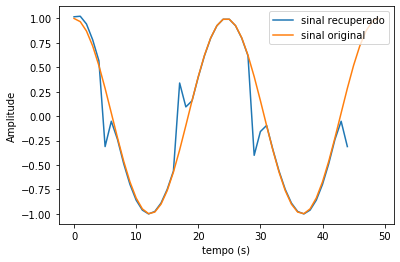

In [168]:
estado= [] 
e = 0
for  i in range(2,len(m_hat)):
    if(m_hat[i]<m_hat[i-2]):
        #print('descida',i, ':',m_hat[i])
         
        estado.append('descida')
    if(m_hat[i]>m_hat[i-2]):
        estado.append('subida')
        print('subida',i, ':',m_hat[i])

 
contador =0
env = []

      
def descida(a,b):
    for i in range(a,b):
        if(estado[i]=='descida'):
            env.append(m_hat[i])
        if(estado[i]=='subida'):
             env.append(m_hat[i])
def subida(a,b):
    for i in range(a,b):
        if(estado[i]=='descida'):
            env.append(-m_hat[i])
        if(estado[i]=='subida'):
             env.append(-m_hat[i])
           
a=0
b= 5
descida(a,b)
subida(b,b+6)
subida(b+6,b+12)
descida(b+12,b+18) 
descida(b+18,b+24) 
subida(b+24,b+30)
subida(b+30,b+36)
subida(b+36,b+40)
 
 
 
 
 
        
plt.plot(env,label='sinal recuperado')
plt.plot(m,label='sinal original')
plt.xlabel('tempo (s)')
plt.ylabel('Amplitude')
plt.legend()